In [1]:
import pandas as pd
import sqlite3
import numpy as np

# **Generación Base de datos**

In [2]:
# Generando la conexión con una nueva base de datos
connection = sqlite3.connect('pizza_runner.db')

# Creando el objeto para poder realizar modificaciones
cursor = connection.cursor()

## Generación tabla runners

In [3]:
# Generando la tabla
cursor.execute('''
  CREATE TABLE runners (
    "runner_id" INTEGER,
    "registration_date" DATE )

''')

# Actualizando la base de datos
connection.commit()

### Poblando tabla runners

In [4]:

# Construyendo los valores para poblar runners_data
runners_data = [
    (1, '2021-01-01'),
    (2, '2021-01-03'),
    (3, '2021-01-08'),
    (4, '2021-01-15')
]

# Ejecutando la consulta sobre toda la lista
cursor.executemany('INSERT INTO runners VALUES (?, ?)', runners_data)

# Actualizando la tabla
connection.commit()

In [5]:
# Revisando la tabla
pd.read_sql_query('SELECT * FROM runners', connection)

,runner_id,registration_date
0,1,2021-01-01
1,2,2021-01-03
2,3,2021-01-08
3,4,2021-01-15


## Creando la tabla customer_orders

In [6]:
# Generando la tabla
cursor.execute('''
  CREATE TABLE customer_orders (
    "order_id" INTEGER,
    "customer_id" INTEGER,
    "pizza_id" INTEGER,
    "exclusions" VARCHAR(4),
    "extras" VARCHAR(4),
    "order_time" TIMESTAMP )
  ''')

# Actualizando la base de datos
connection.commit()

In [7]:
# Generando los valores para poblar la tabla
customer_orders_data = [
    ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
    ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
    ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
    ('3', '102', '2', '', np.nan, '2020-01-02 23:51:23'),
    ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
    ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
    ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
    ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
    ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
    ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
    ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
    ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
    ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
    ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49')
  ]

# Ejecutando la consulta para insertar los datos a la tabla
cursor.executemany('INSERT INTO customer_orders VALUES (?, ?, ?,?,?,?)', customer_orders_data)

# Actualizando estos datos
connection.commit()

In [8]:
# Revisando la tabla creada y poblada
pd.read_sql_query('SELECT * FROM customer_orders', connection)

,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,None,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,null,1,2020-01-08 21:00:29
8,6,101,2,null,null,2020-01-08 21:03:13
9,7,105,2,null,1,2020-01-08 21:20:29


## Creando la tabla runner_orders

In [9]:
# Creando la tabla
cursor.execute('''
  CREATE TABLE runner_orders (
    "order_id" INTEGER,
    "runner_id" INTEGER,
    "pickup_time" VARCHAR(19),
    "distance" VARCHAR(7),
    "duration" VARCHAR(10),
    "cancellation" VARCHAR(23)
  )
''')

# Actualizando la base de datos
connection.commit()


In [10]:
# Generando la lista para poblar la tabla creada
runners_orders_data = [
  ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
  ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
  ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', np.nan),
  ('4', '2', '2020-01-04 13:53:03', '23.4', '40',  np.nan),
  ('5', '3', '2020-01-08 21:10:57', '10', '15',  np.nan),
  ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
  ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
  ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
  ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
  ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null')
 ]

# Poblando la tabla
cursor.executemany('INSERT INTO runner_orders  VALUES (?, ?, ?, ?, ?, ?)', runners_orders_data)

# Actualizando la base de datos
connection.commit()

In [11]:
pd.read_sql_query('SELECT * FROM runner_orders', connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20km,32 minutes,
1,2,1,2020-01-01 19:10:54,20km,27 minutes,
2,3,1,2020-01-03 00:12:37,13.4km,20 mins,None
3,4,2,2020-01-04 13:53:03,23.4,40,None
4,5,3,2020-01-08 21:10:57,10,15,None
5,6,3,null,null,null,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25km,25mins,null
7,8,2,2020-01-10 00:15:02,23.4 km,15 minute,null
8,9,2,null,null,null,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10km,10minutes,null


## Creando tabla pizza_names

In [12]:
# Creando la tabla
cursor.execute('''
  CREATE TABLE pizza_names (
    "pizza_id" INTEGER,
    "pizza_name" TEXT
  )
''')

# Actualizando los cambios
connection.commit()

In [13]:
# Insertando los valores en la tabla
cursor.execute('INSERT INTO pizza_names VALUES (1, "Meatlovers"), (2, "Vegetarian")')

# Actualizando la BBDD
connection.commit()

In [14]:
# Revisando la tabla
pd.read_sql_query('SELECT * FROM pizza_names', connection)

,pizza_id,pizza_name
0,1,Meatlovers
1,2,Vegetarian


## Creando tabla pizza_recipes

In [15]:
# Creando la tabla
cursor.execute('''
  CREATE TABLE pizza_recipes (
    "pizza_id" INTEGER,
    "toppings" TEXT
  )

''')

# Actualizando la BBDD
connection.commit()

In [16]:
# Poblando la tabla
cursor.execute("INSERT INTO pizza_recipes VALUES (1, '1, 2, 3, 4, 5, 6, 8, 10'), (2, '4, 6, 7, 9, 11, 12')")

# Actualizando la BBDD
connection.commit()

In [17]:
# Revisando la tabla creada y poblada
pd.read_sql_query('SELECT * FROM pizza_recipes', connection)


,pizza_id,toppings
0,1,"1, 2, 3, 4, 5, 6, 8, 10"
1,2,"4, 6, 7, 9, 11, 12"


## Creando tabla pizza_toppings


In [18]:
# Generando la tabla
cursor.execute('''
  CREATE TABLE pizza_toppings (
    "topping_id" INTEGER,
    "topping_name" TEXT
  )
''')

# Actualizando la BBDD
connection.commit()


In [19]:
# Creando una lista de tuplas para llenar la tabla
pizza_toppings_data = [

  (1, 'Bacon'),
  (2, 'BBQ Sauce'),
  (3, 'Beef'),
  (4, 'Cheese'),
  (5, 'Chicken'),
  (6, 'Mushrooms'),
  (7, 'Onions'),
  (8, 'Pepperoni'),
  (9, 'Peppers'),
  (10, 'Salami'),
  (11, 'Tomatoes'),
  (12, 'Tomato Sauce')
]

# Insertando todos los valores de lista de tuplas en la tabla
cursor.executemany('INSERT INTO pizza_toppings VALUES (?, ? )', pizza_toppings_data)

# Actualizando la BBDD
connection.commit()

In [20]:
pd.read_sql_query('SELECT * FROM pizza_toppings', connection)

,topping_id,topping_name
0,1,Bacon
1,2,BBQ Sauce
2,3,Beef
3,4,Cheese
4,5,Chicken
5,6,Mushrooms
6,7,Onions
7,8,Pepperoni
8,9,Peppers
9,10,Salami


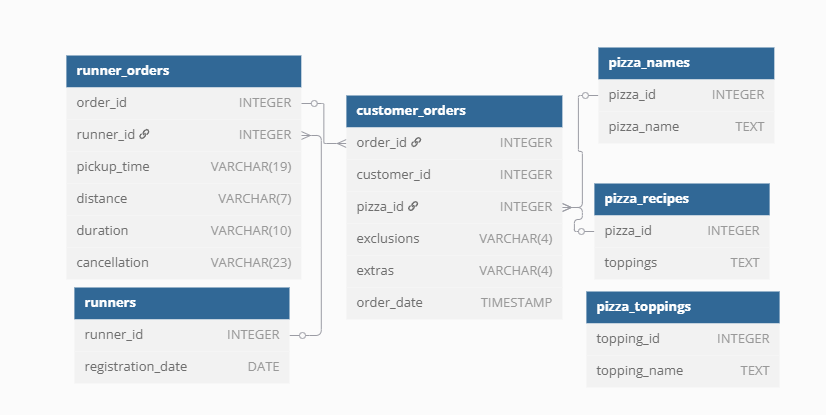



---



# **EXPLORAR, TRANSFORMAR Y CARGAR**

## Revisando tabla customer_orders


Para `order_id`, `customer_id`, `pizza_id` y `order_time` no se necesita realizar ninguna modificación.

`exclusions` y `extras`: En estas columnas hay valores nulos y valores 'nulos' como strings por lo que es necesario reemplazarlos



In [21]:

# Query transformador de la tabla
query = '''

  SELECT
    order_id,
    customer_id,
    pizza_id,
    CASE                                                      -- Reemplazando nulos por ''
      WHEN exclusions IS NULL OR exclusions = 'null' THEN ''
      ELSE exclusions
    END AS exclusions,
    CASE                                                      -- Reemplazando nulos por ''
      WHEN extras IS NULL OR extras = 'null' THEN ''
      ELSE extras
    END AS extras,
    order_time
  FROM
    customer_orders

'''

pd.read_sql_query(query, connection)


,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,,1,2020-01-08 21:00:29
8,6,101,2,,,2020-01-08 21:03:13
9,7,105,2,,1,2020-01-08 21:20:29


## Actualizando la tabla

In [22]:
# Con el query transformador realizamos el update de la tabla

update_query = """
  UPDATE customer_orders
  SET
    exclusions = CASE
      WHEN exclusions IS NULL OR exclusions = 'null' THEN ''
      ELSE exclusions
    END,
    extras = CASE
      WHEN extras IS NULL OR extras = 'null' THEN ''
      ELSE extras
    END;
"""

# Ejecutar la sentencia UPDATE
cursor.execute(update_query)

# Guardar los cambios en la base de datos
connection.commit()

In [23]:
pd.read_sql_query('SELECT * FROM customer_orders', connection)

,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,,1,2020-01-08 21:00:29
8,6,101,2,,,2020-01-08 21:03:13
9,7,105,2,,1,2020-01-08 21:20:29


## Revisando runner_orders

In [24]:
query = '''

  SELECT
      *
  FROM
    runner_orders

'''

pd.read_sql_query(query, connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20km,32 minutes,
1,2,1,2020-01-01 19:10:54,20km,27 minutes,
2,3,1,2020-01-03 00:12:37,13.4km,20 mins,None
3,4,2,2020-01-04 13:53:03,23.4,40,None
4,5,3,2020-01-08 21:10:57,10,15,None
5,6,3,null,null,null,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25km,25mins,null
7,8,2,2020-01-10 00:15:02,23.4 km,15 minute,null
8,9,2,null,null,null,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10km,10minutes,null


`pickup_time`: Posee valores nulos

`distancia`: Tiene valores nuelos además de km, la que vamos a sacar

`duration`: Necesitamos sacar los nulos, las palabras que hacen referencia a minutos

`cancellation`: En esta columna sacaremos los

## Generando el Query corrector

In [25]:
query = '''
  SELECT
    order_id,
    runner_id,
    CASE
      WHEN pickup_time IS NULL OR pickup_time = 'null' THEN ''
      ELSE pickup_time
    END AS pickup_time,
    TRIM(CASE
      WHEN distance IS NULL OR distance = 'null' THEN ''
      ELSE distance
    END, 'km') AS distance,
    CASE
      WHEN duration IS NULL OR duration = 'null' THEN ''
      WHEN duration LIKE '%mins' THEN REPLACE(duration, 'mins', '')
      WHEN duration LIKE '%minute' THEN REPLACE(duration, 'minute', '')
      WHEN duration LIKE '%minutes' THEN REPLACE(duration, 'minutes', '')
      ELSE duration
    END AS duration,
    CASE
      WHEN cancellation IS NULL OR cancellation = 'null' THEN ''
      ELSE cancellation
    END AS cancellation
  FROM
    runner_orders
'''

pd.read_sql_query(query, connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20,32,
1,2,1,2020-01-01 19:10:54,20,27,
2,3,1,2020-01-03 00:12:37,13.4,20,
3,4,2,2020-01-04 13:53:03,23.4,40,
4,5,3,2020-01-08 21:10:57,10,15,
5,6,3,,,,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25,25,
7,8,2,2020-01-10 00:15:02,23.4,15,
8,9,2,,,,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10,10,


## Update la tabla

In [26]:
update_query = """
UPDATE runner_orders
SET
  pickup_time = CASE
    WHEN pickup_time IS NULL OR pickup_time = 'null' THEN ''
    ELSE pickup_time
  END,
  distance = TRIM(CASE
    WHEN distance IS NULL OR distance = 'null' THEN ''
    ELSE distance
  END, 'km'),
  duration = CASE
    WHEN duration IS NULL OR duration = 'null' THEN ''
    WHEN duration LIKE '%mins' THEN REPLACE(duration, 'mins', '')
    WHEN duration LIKE '%minute' THEN REPLACE(duration, 'minute', '')
    WHEN duration LIKE '%minutes' THEN REPLACE
    (duration, 'minutes', '')
    ELSE duration
  END,
  cancellation = CASE
    WHEN cancellation IS NULL OR cancellation = 'null' THEN ''
    ELSE cancellation
  END;
"""

# Ejecutar la sentencia UPDATE
cursor.execute(update_query)

# Guardar los cambios en la base de datos
connection.commit()



---



# **PREGUNTAS**

## Generando dataframes para respuestas en pandas

In [27]:
df_customer_orders = pd.read_sql_query('''SELECT * FROM customer_orders''', connection)
df_pizza_names = pd.read_sql_query('''SELECT * FROM pizza_names''', connection)
df_runner_orders = pd.read_sql_query('''SELECT * FROM runner_orders''', connection)
df_pizza_recipes = pd.read_sql_query('''SELECT * FROM pizza_recipes''', connection)
df_pizza_toppings = pd.read_sql_query('''SELECT * FROM pizza_toppings''', connection)

# **1. Cúantas pizzas fueron ordenadas ?**

### RESPUESTA **SQL**

In [28]:
query = '''
  SELECT
    COUNT(*) AS total_pizas_ordenadas
   FROM
      customer_orders


'''

pd.read_sql_query(query, connection)

,total_pizas_ordenadas
0,14


### Respuesta **Pandas**

In [29]:
print(f'Total de pizzas ordenadas {df_customer_orders["order_id"].size}')

Total de pizzas ordenadas 14


# **2. Cúantas ordenes unicas por cliente fueron realizadas?**


### Respuesta **SQL**

In [30]:
query = '''
  SELECT
    COUNT(DISTINCT order_id) AS total_pizas_ordenadas
   FROM
      customer_orders


'''

pd.read_sql_query(query, connection)

,total_pizas_ordenadas
0,10


### Respuesta **Pandas**

In [31]:
print(f'El total de ordenes unicas de los clientes fue {df_customer_orders["order_id"].nunique()}')

El total de ordenes unicas de los clientes fue 10


# **3. Cuantas ordenes exitosas fueron entregadas por cada repartidor?**


### Respuesta **SQL**

In [32]:
query = '''

  SELECT
    runner_id,
    COUNT(order_id) AS total_pizas_repartidas
   FROM
    runner_orders
  WHERE CAST(distance AS INTEGER) !=0
  GROUP BY
    runner_id



'''
pd.read_sql_query(query, connection)


,runner_id,total_pizas_repartidas
0,1,4
1,2,3
2,3,1


### Respuesta **Pandas**

In [33]:
df = pd.read_sql_query('''SELECT * FROM runner_orders''', connection)
df

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20,32,
1,2,1,2020-01-01 19:10:54,20,27,
2,3,1,2020-01-03 00:12:37,13.4,20,
3,4,2,2020-01-04 13:53:03,23.4,40,
4,5,3,2020-01-08 21:10:57,10,15,
5,6,3,,,,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25,25,
7,8,2,2020-01-10 00:15:02,23.4,15,
8,9,2,,,,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10,10,


In [34]:
df_filtrado = df_runner_orders[(df_runner_orders['distance']!=0) & (df_runner_orders['distance']!='')]

df_filtrado.groupby('runner_id')[['order_id']].count().rename(columns={'order_id':'total_pizas_repartidas'})

,total_pizas_repartidas
runner_id,
1,4
2,3
3,1


## **4. Cuantos pizas de cada tipo fueron entregadas?**





### Respuesta **SQL**

In [35]:
query = '''

  SELECT
    pizza_name,
    COUNT(c.order_id) AS total_pizas_ordenadas
   FROM
    customer_orders c
  INNER JOIN
    runner_orders r
      ON
        c.order_id = r.order_id
  INNER JOIN
    pizza_names p
    ON
      c.pizza_id = p.pizza_id
  WHERE
    CAST(distance AS INTEGER) !=0
  GROUP BY
    pizza_name

'''
pd.read_sql_query(query, connection)




,pizza_name,total_pizas_ordenadas
0,Meatlovers,9
1,Vegetarian,3


### Respuesta **Pandas**

In [36]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = pd.merge(df_merge, df_pizza_names, on='pizza_id')
df_merge = df_merge[(df_merge['distance']!=0) & (df_merge['distance']!='')]
df_merge

,order_id,customer_id,pizza_id,exclusions,extras,order_time,runner_id,pickup_time,distance,duration,cancellation,pizza_name
0,1,101,1,,,2020-01-01 18:05:02,1,2020-01-01 18:15:34,20,32,,Meatlovers
1,2,101,1,,,2020-01-01 19:00:52,1,2020-01-01 19:10:54,20,27,,Meatlovers
2,3,102,1,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Meatlovers
3,3,102,2,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Vegetarian
4,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
5,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
6,4,103,2,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Vegetarian
7,5,104,1,,1,2020-01-08 21:00:29,3,2020-01-08 21:10:57,10,15,,Meatlovers
9,7,105,2,,1,2020-01-08 21:20:29,2,2020-01-08 21:30:45,25,25,,Vegetarian
10,8,102,1,,,2020-01-09 23:54:33,2,2020-01-10 00:15:02,23.4,15,,Meatlovers


In [37]:
df_merge.groupby(['pizza_name'])['order_id'].count().rename('total_pizas_ordenadas')

,total_pizas_ordenadas
pizza_name,
Meatlovers,9
Vegetarian,3


# **5. Cuantas pizzas vegetarianas y meatlovers fueron ordenadas por cada cliente?**


### Respuesta **SQL**

In [38]:
query = '''

  SELECT
    c.customer_id,
    pizza_name,
    COUNT(c.order_id) AS total_pizas_ordenadas
   FROM
    customer_orders c
  INNER JOIN
    runner_orders r
      ON
        c.order_id = r.order_id
  INNER JOIN
    pizza_names p
    ON
      c.pizza_id = p.pizza_id

  GROUP BY
    c.customer_id, pizza_name

'''
pd.read_sql_query(query, connection)


,customer_id,pizza_name,total_pizas_ordenadas
0,101,Meatlovers,2
1,101,Vegetarian,1
2,102,Meatlovers,2
3,102,Vegetarian,1
4,103,Meatlovers,3
5,103,Vegetarian,1
6,104,Meatlovers,3
7,105,Vegetarian,1


### Respuesta **Pandas**

In [39]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = pd.merge(df_merge, df_pizza_names, on='pizza_id')
df_merge

,order_id,customer_id,pizza_id,exclusions,extras,order_time,runner_id,pickup_time,distance,duration,cancellation,pizza_name
0,1,101,1,,,2020-01-01 18:05:02,1,2020-01-01 18:15:34,20,32,,Meatlovers
1,2,101,1,,,2020-01-01 19:00:52,1,2020-01-01 19:10:54,20,27,,Meatlovers
2,3,102,1,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Meatlovers
3,3,102,2,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Vegetarian
4,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
5,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
6,4,103,2,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Vegetarian
7,5,104,1,,1,2020-01-08 21:00:29,3,2020-01-08 21:10:57,10,15,,Meatlovers
8,6,101,2,,,2020-01-08 21:03:13,3,,,,Restaurant Cancellation,Vegetarian
9,7,105,2,,1,2020-01-08 21:20:29,2,2020-01-08 21:30:45,25,25,,Vegetarian


In [40]:
df_merge.groupby(['customer_id', 'pizza_name'])['order_id'].count().rename('total_pizas_ordenadas')

customer_id  pizza_name
101          Meatlovers    2
             Vegetarian    1
102          Meatlovers    2
             Vegetarian    1
103          Meatlovers    3
             Vegetarian    1
104          Meatlovers    3
105          Vegetarian    1
Name: total_pizas_ordenadas, dtype: int64

## **6. Cual es el máximo numero de pizas entregado en una unica orden ?**




### Respuesta **SQL**

In [41]:
query = '''
  WITH pizzas_ordenadas_per_order_id AS (
  SELECT
      r.order_id,
      COUNT(c.customer_id) AS total_pizas_ordenadas
   FROM
    customer_orders c
  INNER JOIN
    runner_orders r
      ON
        c.order_id = r.order_id
  WHERE
    CAST(distance AS INTEGER) !=0
  GROUP BY c.order_id )

  SELECT
    MAX(total_pizas_ordenadas) AS maximo_pizzas_ordenadas
  FROM
    pizzas_ordenadas_per_order_id

'''
pd.read_sql_query(query, connection)

,maximo_pizzas_ordenadas
0,3


### Respuesta **Pandas**

In [42]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = df_merge[(df_merge['distance']!=0) & (df_merge['distance']!='')]


In [43]:
df_merge.groupby(['order_id'])['customer_id'].count().max()

3

# **7. Por cada cliente, cuntas pizzas entregadas tienen al menos 1 cambio y cuando no tienen cambios?**


### Respuesta **SQL**

In [71]:
query = '''
  SELECT
    c.customer_id,
    SUM(CASE
      WHEN CAST(c.exclusions AS FLOAT) !=0 OR CAST(c.extras AS FLOAT) !=0 THEN 1
      ELSE 0
    END) AS cambios,
    SUM(CASE
      WHEN CAST(c.exclusions AS FLOAT) =0 AND CAST(c.extras AS FLOAT) =0 THEN 1
      ELSE 0
    END) AS sin_cambios
  FROM
    customer_orders c
  LEFT JOIN
    runner_orders r
    ON
      c.order_id = r.order_id
  WHERE
    CAST(r.distance AS INTEGER) !=0
  GROUP BY
    c.customer_id

'''
pd.read_sql_query(query, connection)

,customer_id,cambios,sin_cambios
0,101,0,2
1,102,0,3
2,103,3,0
3,104,2,1
4,105,1,0


### Respuesta **Pandas**

In [72]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = df_merge[(df_merge['distance']!=0) & (df_merge['distance']!='')]
df_merge

,order_id,customer_id,pizza_id,exclusions,extras,order_time,runner_id,pickup_time,distance,duration,cancellation
0,1,101,1,,,2020-01-01 18:05:02,1,2020-01-01 18:15:34,20,32,
1,2,101,1,,,2020-01-01 19:00:52,1,2020-01-01 19:10:54,20,27,
2,3,102,1,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,
3,3,102,2,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,
4,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,
5,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,
6,4,103,2,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,
7,5,104,1,,1,2020-01-08 21:00:29,3,2020-01-08 21:10:57,10,15,
9,7,105,2,,1,2020-01-08 21:20:29,2,2020-01-08 21:30:45,25,25,
10,8,102,1,,,2020-01-09 23:54:33,2,2020-01-10 00:15:02,23.4,15,


In [73]:
df_merge.loc[(df_merge['exclusions']!='') | (df_merge['extras']!=''), 'cambios'] = 1
df_merge.loc[(df_merge['exclusions']=='') & (df_merge['extras']==''), 'sin_cambios'] = 1

In [74]:
df_merge.groupby(['customer_id'])[['cambios', 'sin_cambios']].sum()

,cambios,sin_cambios
customer_id,,
101,0.0,2.0
102,0.0,3.0
103,3.0,0.0
104,2.0,1.0
105,1.0,0.0


#**8. Cúantas pizzas fueron entregadas que tengan ambas exclusiones y extras?**

### Respuesta **SQL**

In [77]:
query = '''
  SELECT
    SUM(CASE
      WHEN CAST(c.exclusions AS FLOAT) !=0 AND CAST(c.extras AS FLOAT) !=0 THEN 1
      ELSE 0
    END) AS cambios
  FROM
    customer_orders c
  LEFT JOIN
    runner_orders r
    ON
      c.order_id = r.order_id
  WHERE
    CAST(r.distance AS INTEGER) !=0
  GROUP BY
    c.customer_id
  HAVING cambios >0

'''
pd.read_sql_query(query, connection)

,cambios
0,1


### Respuesta **SQL**

In [82]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = df_merge[(df_merge['distance']!=0) & (df_merge['distance']!='')]
df_merge.loc[(df_merge['exclusions']!='') & (df_merge['extras']!=''), 'cambios'] = 1

df_merge[['cambios']].max()

,0
cambios,1.0


# **9. Cual fue el volumen total de las pizzas ordenadas por cada hora de el día ?**

### Respuesta **SQL**

In [94]:
query = '''
  SELECT
    strftime('%H', order_time) AS hora_del_dia,
    COUNT(order_id) AS total_pizzas_ordenadas
  FROM
    customer_orders
  GROUP BY
    strftime('%H', order_time)

'''
pd.read_sql_query(query, connection)

,hora_del_dia,total_pizzas_ordenadas
0,11,1
1,13,3
2,18,3
3,19,1
4,21,3
5,23,3


### Respuesta **Pandas**

In [93]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')

df_merge['horas'] = pd.to_datetime(df_merge['order_time']).dt.hour
df_merge.groupby(df_merge['horas'])['order_id'].count()

,order_id
horas,
11,1
13,3
18,3
19,1
21,3
23,3


# **10. Cúal fue el volumen de ordenes por cada dia de la semana ?**

In [145]:
query = '''
SELECT
    CASE strftime('%w', date(order_time))
        WHEN '0' THEN 'Domingo'
        WHEN '1' THEN 'Lunes'
        WHEN '2' THEN 'Martes'
        WHEN '3' THEN 'Miércoles'
        WHEN '4' THEN 'Jueves'
        WHEN '5' THEN 'Viernes'
        WHEN '6' THEN 'Sábado'
    END AS nombre_dia_semana,
    COUNT(order_id) AS total_pizzas_ordenadas
FROM
    customer_orders
GROUP BY
    CASE strftime('%w', date(order_time))
        WHEN '0' THEN 'Domingo'
        WHEN '1' THEN 'Lunes'
        WHEN '2' THEN 'Martes'
        WHEN '3' THEN 'Miércoles'
        WHEN '4' THEN 'Jueves'
        WHEN '5' THEN 'Viernes'
        WHEN '6' THEN 'Sábado'
    END
ORDER BY
    CASE strftime('%w', date(order_time))
        WHEN '0' THEN 7
        WHEN '1' THEN 1
        WHEN '2' THEN 2
        WHEN '3' THEN 3
        WHEN '4' THEN 4
        WHEN '5' THEN 5
        WHEN '6' THEN 6
    END

'''
pd.read_sql_query(query, connection)

,nombre_dia_semana,total_pizzas_ordenadas
0,Miércoles,5
1,Jueves,3
2,Viernes,1
3,Sábado,5


In [148]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')

df_merge['dias'] = pd.to_datetime(df_merge['order_time']).dt.day_name()
df_merge.groupby(df_merge['dias'])['order_id'].count().rename('total_pizzas_ordenadas')

,total_pizzas_ordenadas
dias,
Friday,1
Saturday,5
Thursday,3
Wednesday,5
